In [2]:
from cvxpy import *
import numpy as np

In [3]:
p1 = [(1,1), (3,5), (4,2), (2,0)]
p2 = [(5,5), (6,7), (7,8), (8,7), (9,4)]

A1 = np.array(p1).T
A2 = np.array(p2).T


# Construct the problem.
x = Variable(4)
y = Variable(5)
objective = Minimize(sum_squares(A1*x - A2*y))
constraints = [x > 0, y > 0, sum(x) == 1, sum(y) == 1]
prob = Problem(objective, constraints)

result = prob.solve()
print(x.value)
print(y.value)

[[ -1.28830404e-10]
 [  8.00000402e-01]
 [  1.99999598e-01]
 [ -3.79047323e-11]]
[[  1.00000000e+00]
 [  2.06281636e-10]
 [  5.37763691e-11]
 [  1.70887878e-11]
 [  2.51592339e-11]]


In [4]:
x1 = (A1 * x.value)[0, 0]
y1 = (A1 * x.value)[1, 0]

x2 = (A2 * y.value)[0, 0]
y2 = (A2 * y.value)[1, 0]

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from IPython.core.pylabtools import figsize
figsize(7, 7)

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

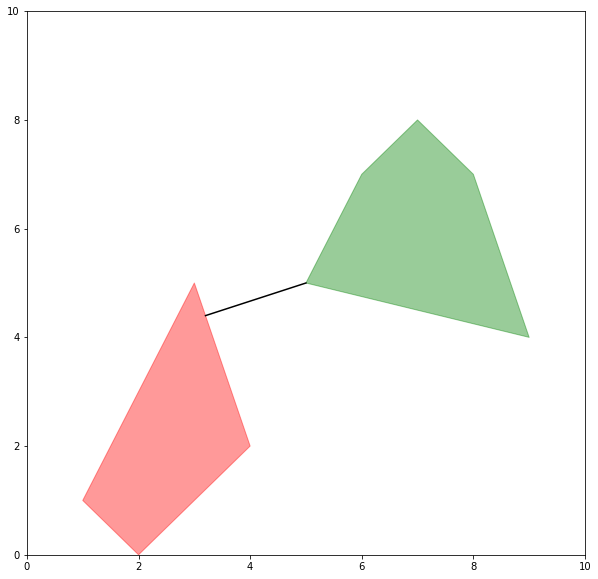

In [6]:
figsize(10,10)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

patches.append(Polygon(np.array(p1), True))
patches.append(Polygon(np.array(p2), True))

p = PatchCollection(patches, color=['red', 'green'], alpha=0.4)

plt.plot([x1, x2], [y1, y2], 'k-')

ax.add_collection(p)
plt.show()

Решить задачу поиска расстояния между двумя многогранниками методом Франка-Вульфа.

In [15]:
from scipy.optimize import linprog

In [42]:
# Construct the problem.
x0 = np.array([1, 0, 0, 0])
y0 = np.array([1, 0, 0, 0, 0])

for k in range(100):
    t = 2 * (np.dot(A1, x0) - np.dot(A2, y0))

    c1 = np.dot(t, A1) 
    c2 = -np.dot(t, A2)
    
    x_c = linprog(c1, A_ub=-np.eye(4), b_ub=np.zeros(4), A_eq=np.ones((1, 4)), b_eq=1).x
    y_c = linprog(c2, A_ub=-np.eye(5), b_ub=np.zeros(5), A_eq=np.ones((1, 5)), b_eq=1).x
    
    p = 2 / (2 + k)
    
    x0 = (1 - p) * x0 + p * x_c 
    y0 = (1 - p) * y0 + p * y_c 

In [43]:
x1, y1 = np.dot(A1, x0)
x2, y2 = np.dot(A2, y0)

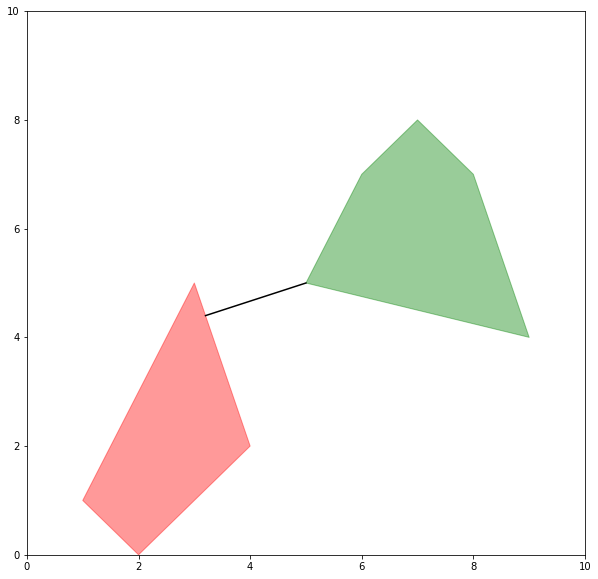

In [44]:

figsize(10,10)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

patches.append(Polygon(np.array(p1), True))
patches.append(Polygon(np.array(p2), True))

p = PatchCollection(patches, color=['red', 'green'], alpha=0.4)

plt.plot([x1, x2], [y1, y2], 'k-')

ax.add_collection(p)
plt.show()